In [153]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches

from time import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#Boosting Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import StackingClassifier

#Advanced Algorithms
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier

from sklearn import metrics
import statsmodels.api as sm
import pickle
import gc 

from sklearn.preprocessing import LabelEncoder

#Oversampling
from imblearn.over_sampling import SMOTE


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [154]:
#Reading the Dataset

In [155]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# Exploatory Data Analysis

In [156]:
train.shape, test.shape

((45528, 19), (11383, 18))

In [157]:
train.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [158]:
test.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,CST_142525,Siva,52,F,Y,N,0.0,232640.53,998.0,Unknown,2.0,0.0,14406.73,26524.40,4,779.0,0,0
1,CST_129215,Scott,48,F,N,N,1.0,284396.79,1338.0,Unknown,3.0,0.0,57479.99,68998.72,70,806.0,0,0
2,CST_138443,Victoria,50,F,N,N,1.0,149419.28,1210.0,Unknown,3.0,0.0,21611.01,25187.80,71,528.0,2,0
3,CST_123812,John McCrank,30,F,N,N,1.0,160437.54,503.0,Laborers,2.0,1.0,28990.76,29179.39,9,815.0,0,0
4,CST_144450,Martinne,52,M,N,Y,0.0,233480.37,157.0,Laborers,2.0,1.0,54213.72,82331.82,82,613.0,1,1


In [159]:
df_train = train.copy()
df_test = test.copy()

In [49]:
df_train['gender'] = df_train['gender'].map({'F':0, 'M':1, 'XNA':2})
df_train['owns_car'] = df_train['owns_car'].map( {'N':0, 'Y':1})
df_train['owns_house'] = df_train['owns_house'].map( {'N':0, 'Y':1})

df_test['gender'] = df_test['gender'].map({'F':0, 'M':1 , 'XNA':2})
df_test['owns_car'] = df_test['owns_car'].map( {'N':0, 'Y':1})
df_test['owns_house'] = df_test['owns_house'].map( {'N':0, 'Y':1})

In [50]:
#One hot Encoding
# df_train = pd.concat([df_train, pd.get_dummies(df_train['occupation_type'], prefix='occupation_type')], axis=1)
# df_test = pd.concat([df_test, pd.get_dummies(df_test['occupation_type'], prefix='occupation_type')], axis=1)

In [160]:
cols_to_drop = ['customer_id']

df_train.drop(cols_to_drop,axis=1,inplace=True)
df_test.drop(cols_to_drop,axis=1,inplace=True)

In [52]:
from sklearn.preprocessing import LabelEncoder
df_train['name'] = LabelEncoder().fit_transform(df_train['name'])

In [96]:
df_test['name'] = LabelEncoder().fit_transform(df_test['name'])

In [53]:
df_train.isna().sum()

name                                       0
age                                        0
gender                                     0
owns_car                                 547
owns_house                                 0
no_of_children                           774
net_yearly_income                          0
no_of_days_employed                      463
total_family_members                      83
migrant_worker                            87
yearly_debt_payments                      95
credit_limit                               0
credit_limit_used(%)                       0
credit_score                               8
prev_defaults                              0
default_in_last_6months                    0
credit_card_default                        0
occupation_type_Accountants                0
occupation_type_Cleaning staff             0
occupation_type_Cooking staff              0
occupation_type_Core staff                 0
occupation_type_Drivers                    0
occupation

In [161]:
#Imputing the Missing Values
df_train = df_train.fillna(0)
df_test = df_test.fillna(0)

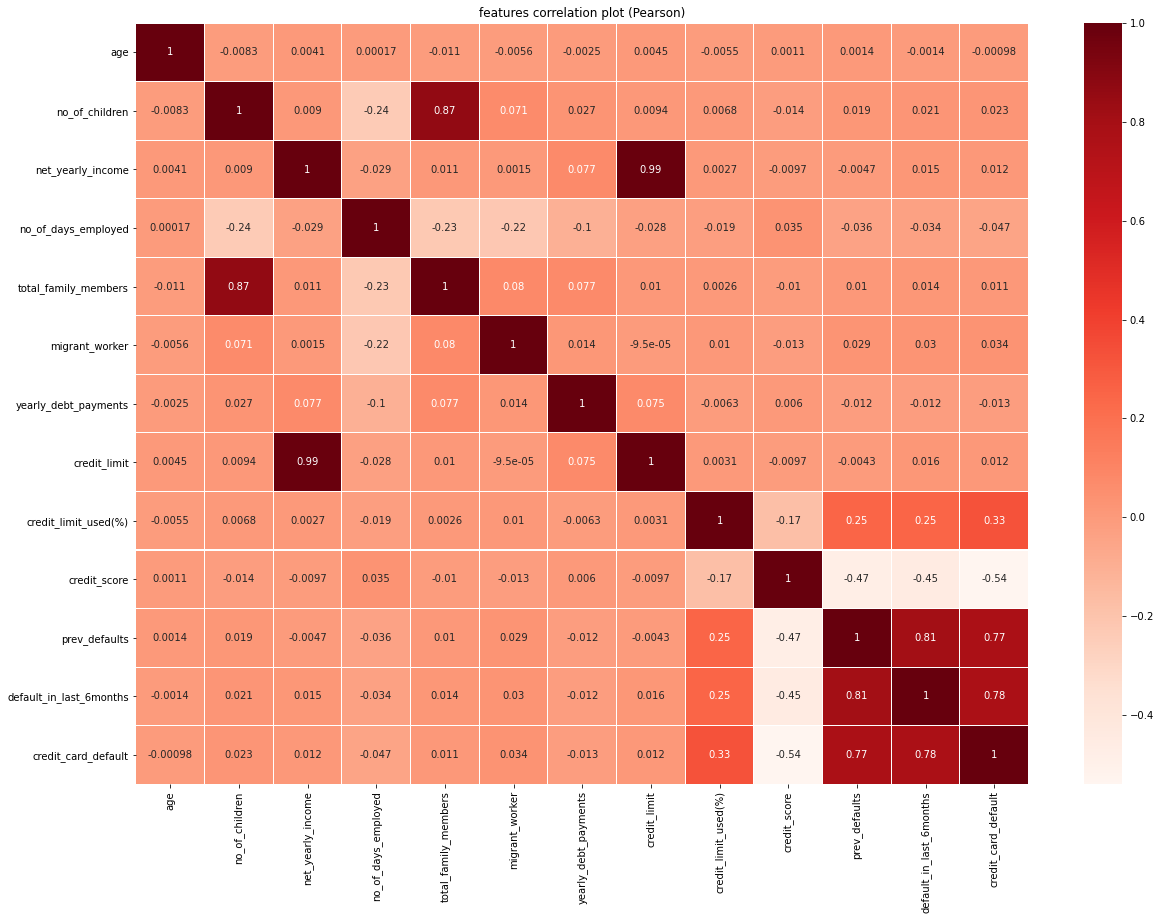

In [162]:
plt.figure(figsize = (20,14))
plt.title('features correlation plot (Pearson)')
corr = df_train.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True,linewidths=.1,cmap="Reds")
plt.show()

In [163]:
X = df_train.drop(['credit_card_default'],axis=1)
y = df_train['credit_card_default']

In [148]:
#top_feats = list(X.columns)
top_feats = ['default_in_last_6months', 'prev_defaults', 'credit_score', 'credit_limit_used(%)','default_in_last_6months']

In [149]:
X = X[top_feats]

In [152]:
# from tpot import TPOTClassifier
# from sklearn.datasets import load_digits
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

# tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2)
# tpot.fit(X_train, y_train)
# print(tpot.score(X_test, y_test))
# tpot.export('tpot_boston_pipeline.py')

# Feature Importances

In [119]:
def top6_feats(model,n=6):
    top_feats = []
    model.fit(X,y)
    feature_importances = model.feature_importances_
    # Make sure to average feature importances! 
    feature_importances = pd.DataFrame({'feature': list(X.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)
    top_feats = list(feature_importances['feature'][:n].values)
    feat_imp = pd.Series(model.feature_importances_, index=X.columns)
    feat_imp.nlargest(n).plot(kind='barh')
    plt.figure(figsize=(8,6))
    plt.show()
    return top_feats

In [120]:
accuracy = {}
speed = {}
def BaseModel(model):
    start = time()
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
    score = cross_val_score(model, X[top_feats], y, scoring='accuracy', cv=cv, n_jobs=-1)

    speed[model] = np.round(time() - start, 3)
    accuracy[model] = (np.mean(score) * 100).round(3)

    print(f"Mean Accuracy: {accuracy[model]}\nSTD: {np.std(score):.3f}\nRun Time: {speed[model]}s")

In [137]:
model_rfc = RandomForestClassifier(n_estimators=100,max_depth=5,random_state=0)

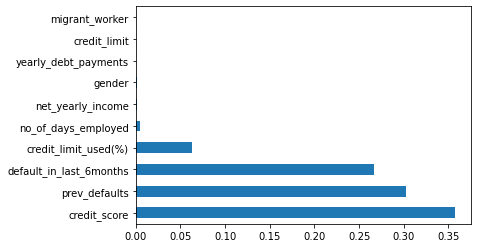

<Figure size 576x432 with 0 Axes>

['credit_score', 'prev_defaults', 'default_in_last_6months', 'credit_limit_used(%)', 'no_of_days_employed', 'net_yearly_income', 'gender', 'yearly_debt_payments', 'credit_limit', 'migrant_worker']


In [138]:
top_feats_rfc = top6_feats(model_rfc,10)
print(top_feats_rfc)

In [139]:
BaseModel(model_rfc)

Mean Accuracy: 98.012
STD: 0.001
Run Time: 8.784s


----------------

In [110]:
model_gbc = GradientBoostingClassifier(n_estimators=1250,
                                       random_state=0,
                                       max_depth=6,
                                       min_samples_split=5,
                                       learning_rate=0.2)

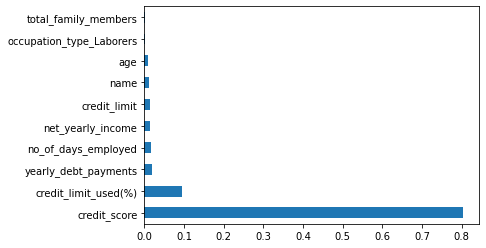

<Figure size 576x432 with 0 Axes>

['credit_score', 'credit_limit_used(%)', 'yearly_debt_payments', 'no_of_days_employed', 'net_yearly_income', 'credit_limit', 'name', 'age', 'occupation_type_Laborers', 'total_family_members']


In [111]:
top_feats_gbc = top6_feats(model_gbc,10)
print(top_feats_gbc)

In [112]:
BaseModel(model_gbc)

Mean Accuracy: 97.299
STD: 0.002
Run Time: 165.655s


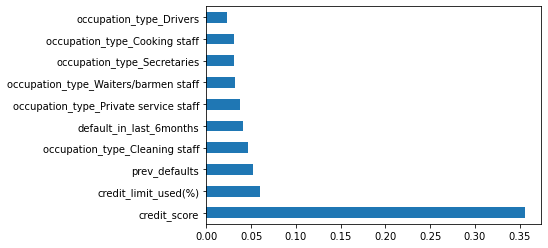

<Figure size 576x432 with 0 Axes>

['credit_score', 'credit_limit_used(%)', 'prev_defaults', 'occupation_type_Cleaning staff', 'default_in_last_6months', 'occupation_type_Private service staff', 'occupation_type_Waiters/barmen staff', 'occupation_type_Secretaries', 'occupation_type_Cooking staff', 'occupation_type_Drivers']


In [113]:
model_xgbc = XGBClassifier(learning_rate =0.2,
                            n_estimators=200,
                            max_depth=5,
                            min_child_weight=1,
                            subsample=0.85,
                            random_state=0)

top_feats_xgbc = top6_feats(model_xgbc,10)
print(top_feats_xgbc)

In [114]:
BaseModel(model_xgbc)

Mean Accuracy: nan
STD: nan
Run Time: 1.227s


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


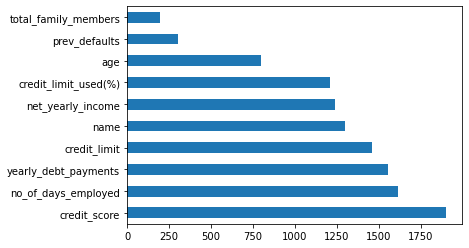

<Figure size 576x432 with 0 Axes>

['credit_score', 'no_of_days_employed', 'yearly_debt_payments', 'credit_limit', 'name', 'net_yearly_income', 'credit_limit_used(%)', 'age', 'prev_defaults', 'total_family_members']


In [115]:
model_lgbm = LGBMClassifier(learning_rate=0.02, max_depth=9,n_estimators=500, n_jobs=4,objective=None, 
                            random_state=0, reg_alpha=2, reg_lambda=5)

top_feats_lgbm = top6_feats(model_lgbm,10)
print(top_feats_lgbm)

In [116]:
BaseModel(model_lgbm)

Mean Accuracy: nan
STD: nan
Run Time: 0.454s


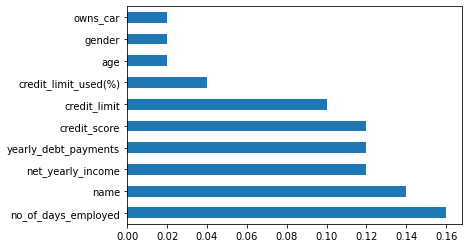

<Figure size 576x432 with 0 Axes>

['no_of_days_employed', 'name', 'net_yearly_income', 'credit_score', 'yearly_debt_payments', 'credit_limit', 'credit_limit_used(%)', 'prev_defaults', 'occupation_type_Unknown', 'occupation_type_Managers']


In [84]:
model_adb = AdaBoostClassifier()
top_feats_adb = top6_feats(model_adb,10)
print(top_feats_adb)


In [85]:

BaseModel(model_adb)

Mean Accuracy: 97.966
STD: 0.001
Run Time: 9.845s


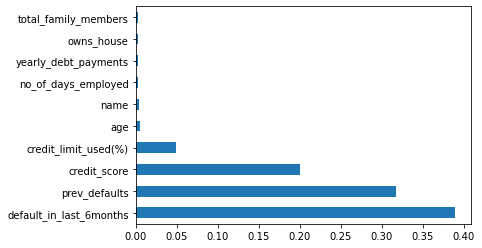

<Figure size 576x432 with 0 Axes>

['default_in_last_6months', 'prev_defaults', 'credit_score', 'credit_limit_used(%)', 'age', 'name', 'no_of_days_employed', 'yearly_debt_payments', 'owns_house', 'total_family_members']


In [86]:
model_etc = ExtraTreesClassifier(bootstrap=True, 
                                 criterion='gini', 
                                 max_features=0.6000000000000001, 
                                 min_samples_leaf=6, 
                                 min_samples_split=19, 
                                 n_estimators=250)

top_feats_etr = top6_feats(model_etc,10)
print(top_feats_etr)

In [87]:
BaseModel(model_etc)

Mean Accuracy: 98.052
STD: 0.001
Run Time: 33.887s


In [164]:
clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)


# clf.fit(X_train, y_train, 
#         cat_features=cat_features, 
#         eval_set=(X_val, y_val), 
#         verbose=False
# )
top_feats_cb = top6_feats(model_cb,10)
print(top_feats_cb)

CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=0]="ita Bose": Cannot convert 'b'ita Bose'' to float

In [92]:
#/BaseModel(model_cb)

In [101]:
estimators=[ ('etc', model_etc),
              ('gbc',model_gbc)]

voting = VotingClassifier(estimators,voting='soft')

In [140]:
model_rfc.fit(X[top_feats],y)

RandomForestClassifier(max_depth=5, random_state=0)

In [141]:
#preds = clf.predict(df_test)
preds1 = model_rfc.predict(df_test[top_feats])

In [142]:
submission1 = pd.DataFrame({'customer_id':test.customer_id,'credit_card_default':preds1})

In [146]:
submission1['credit_card_default'].value_counts()

0    10732
1      651
Name: credit_card_default, dtype: int64

In [147]:
submission.to_csv(f'submission_rf11.csv',index=False)